<a href="https://colab.research.google.com/github/tempzeba/iot_test_public/blob/main/A1L02002_log_20201120_(DNN_tensorflow2_0)_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) 程式說明
### 目的：A1L02002 IOT異常分析
### 運行環境：

In [152]:
import sys
print("python版本:%s"% sys.version)

python版本:3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [153]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [154]:
# pip install urllib3

In [155]:

# try:
#     from urllib.request import urlopen
# except ImportError:
#     from urllib2 import urlopen

from urllib.request import urlopen
from io import BytesIO
import zipfile

import pandas as pd

# Dictionary holding all the dataframes from all zip/zip/csvs
df_train = pd.DataFrame()


def zip_to_dfs(data):
    global df_train
    zip_file = zipfile.ZipFile(BytesIO(data))

    for name in zip_file.namelist():
        if name.lower().endswith('.csv'):
            df_train = df_train.append(pd.read_csv(zip_file.open(name), sep='\t'))
        elif name.lower().endswith('.zip'):
            zip_to_dfs(zip_file.open(name).read())
        # print(dfs)


def get_zip_data_from_url(url):
    req = urlopen(url)
    zip_to_dfs(req.read())


final_links_list = [
    'https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02002_202009.zip']

for link in final_links_list:
    print(link)
    get_zip_data_from_url(link)

# Display the first couple of dataframes    
# for name, df in sorted(dfs.items())[:2]:
#     print('\n', name, '\n')
#     print(df)

# print(dfs)

https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02002_202009.zip


## 1) 載入資料集

In [156]:
# df_train = pd.read_csv('./data/Iris.csv')
# df_train = pd.read_csv('https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02001_log_01.csv', sep='\t')
df_train = df_train.drop(labels=[r'收集日期', 
r'抽樣秒', 
r'位址區段E32768紀錄時間', 
r'位址區段G32768紀錄時間', 
r'位址區段G12288紀錄時間',
r'機台編號',
r'目前生產配方'
,
 '壓力檢測啟動',
 'Cycle_Time',
 '第一穴預吹延遲',
 '第二穴預吹延遲',
 '第三穴預吹延遲',
 '第四穴預吹延遲',
 '第五穴預吹延遲',
 '第六穴預吹延遲',
 '第七穴預吹延遲',
 '第八穴預吹延遲',
 '第九穴預吹延遲',
 '第十穴預吹延遲',
 '第一穴高壓延遲',
 '第二穴高壓延遲',
 '第三穴高壓延遲',
 '第四穴高壓延遲',
 '第五穴高壓延遲',
 '第六穴高壓延遲',
 '第七穴高壓延遲',
 '第八穴高壓延遲',
 '第九穴高壓延遲',
 '第十穴高壓延遲',
 '第一穴吹高壓時間',
 '第二穴吹高壓時間',
 '第三穴吹高壓時間',
 '第四穴吹高壓時間',
 '第五穴吹高壓時間',
 '第六穴吹高壓時間',
 '第七穴吹高壓時間',
 '第八穴吹高壓時間',
 '第九穴吹高壓時間',
 '第十穴吹高壓時間',
 '第一穴排氣時間',
 '第二穴排氣時間',
 '第三穴排氣時間',
 '第四穴排氣時間',
 '第五穴排氣時間',
 '第六穴排氣時間',
 '第七穴排氣時間',
 '第八穴排氣時間',
 '第九穴排氣時間',
 '第十穴排氣時間',
 '第九層燈管加熱%',
 '第十層燈管加熱%',
 '產能',
 '吹氣鼓風機轉速',
 '吸氣鼓風機轉速',
 '自轉馬達轉速',
 '整列滾筒調速',
 '牙口鼓風機轉速',
 '入胚啟動位置',
 '入胚啟動延時',
 '震動馬達震動時間',
 '震動馬達震動循環時間',
 '第九穴壓力檢測',
 '第十穴壓力檢測',
#  '破瓶數增加',
 '入胚啟動',
 '加熱啟動',
 '吹瓶啟動',
 '機台異常或無異常',
 '自動或手動',
 '總生產數量',
 '機台是否正常(0~59s)'

],axis=1) 

# 調整資料集
# 1. 只取有異常部分
# 2. 計算有異常資料筆數
# 3. 從無異常資料隨機抽出k筆資料與異常資料合併作為投入模型的資料集。k=異常資料筆數
mask = df_train[r'異常代碼'] > 0
target_count = mask.sum()
df_train_noerr = df_train[df_train[r'異常代碼'] == 0].sample(n=target_count,random_state=123,axis=0)
df_train = df_train[mask]
df_train = df_train.append(df_train_noerr,ignore_index=True)
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
低壓壓力,90898.0,8.981450,1.197770,0.0,8.6,8.70,9.5,12.3
高壓壓力,90898.0,31.915873,2.555084,0.0,31.5,32.20,32.8,34.1
回收壓力,90898.0,17.490793,1.921917,0.0,15.7,18.50,18.7,21.1
預吹壓力,90898.0,9.210258,0.600520,0.0,9.0,9.20,9.5,10.8
最多成型時間,90898.0,11418.377027,8364.704724,20.0,6900.0,7200.00,13530.0,34454.0
第一層燈管加熱%,90898.0,62.430018,7.592069,40.0,55.0,61.50,70.0,95.0
第二層燈管加熱%,90898.0,54.996403,9.556053,4.0,47.0,54.00,66.0,76.0
第三層燈管加熱%,90898.0,38.759384,8.255240,2.0,31.0,44.00,45.0,60.0
第四層燈管加熱%,90898.0,36.969295,9.944069,18.0,24.0,41.00,45.0,63.0
第五層燈管加熱%,90898.0,47.662143,6.275859,25.0,45.0,45.50,47.0,85.0


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

### 註：
略。(IOT原始資料已經一次前處理)

## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。
### 註：
略。(IOT原始資料已經一次前處理)

## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？

In [157]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train[r'異常代碼'])
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 5) 切割訓練集與測試集

In [158]:
pd.set_option('max_row',300)
# X=df_train.drop(labels=['Class'],axis=1)
X=df_train.drop(columns=[r'異常代碼'])
# X.isna().sum().sum()
# X
mask = X.describe().transpose()['std']==0
X.describe().transpose()[mask].index.tolist()
# X.describe().transpose().columns.tolist()


[]

In [159]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [160]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)
# X_train

訓練資料:  (63628, 33)
測試資料:  (27270, 33)


## 6) 建立網路模型

In [161]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [162]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(205, Activation('softmax')))

In [163]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 272       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_20 (Dense)             (None, 205)               3485      
Total params: 3,901
Trainable params: 3,901
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1000
epochs = 50

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/50
58/58 [==============================] - 1s 14ms/step - loss: 1.1057 - acc: 0.6964 - val_loss: 0.9861 - val_acc: 0.7267
Epoch 2/50
58/58 [==============================] - 0s 7ms/step - loss: 0.9721 - acc: 0.7323 - val_loss: 0.9876 - val_acc: 0.7281
Epoch 3/50
58/58 [==============================] - 0s 7ms/step - loss: 0.9733 - acc: 0.7328 - val_loss: 1.0031 - val_acc: 0.7231
Epoch 4/50
58/58 [==============================] - 0s 7ms/step - loss: 0.9710 - acc: 0.7335 - val_loss: 0.9780 - val_acc: 0.7220
Epoch 5/50
58/58 [==============================] - 0s 6ms/step - loss: 0.9711 - acc: 0.7323 - val_loss: 0.9781 - val_acc: 0.7309
Epoch 6/50
58/58 [==============================] - 0s 7ms/step - loss: 0.9730 - acc: 0.7323 - val_loss: 0.9807 - val_acc: 0.7247
Epoch 7/50
58/58 [==============================] - 0s 7ms/step - loss: 0.9715 - acc: 0.7335 - val_loss: 0.9754 - val_acc: 0.7314
Epoch 8/50
58/58 [==============================] - 0s 7ms/step - loss: 0.9754 - acc: 0.7

## 7) 觀察訓練結果

In [167]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

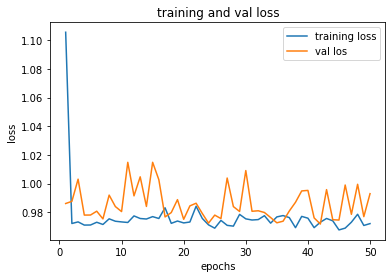

In [168]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

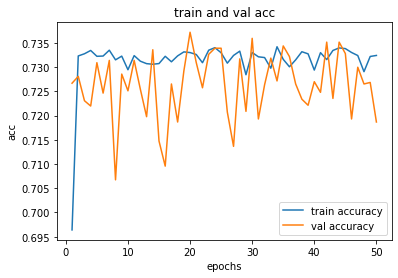

In [169]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 8) 測試

In [170]:
from sklearn.metrics import accuracy_score
label=np.argmax(y,axis=1)
pred =  np.argmax(model.predict(X), axis=1)
# print(pred.shape)
print(accuracy_score(label, pred))
# print(y)

0.7205329050144118


In [171]:
!pip install eli5

## 9) 檢查特徵重要性
> https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
> https://www.mdeditor.tw/pl/pgi5/zh-tw

> 針對BlackBox模型或非sklearn模型，使用排列重要性方法


> 捨棄重要性低、增加損失的features特徵，重新建模訓練。


> 














In [172]:
# import numpy as np
from eli5.permutation_importance import get_score_importances

# ... load data, define score function
def score(X, y):
    y_pred = np.argmax(model.predict(X), axis=1)
    return accuracy_score(y, y_pred)

lab=np.argmax(y_train,axis=1)
base_score, score_decreases = get_score_importances(score, X_train.values, lab)
feature_importances = np.mean(score_decreases, axis=0)



In [173]:
# print(feature_importances)
feature_importance_dict = {}
for i, feature_name in enumerate(X.columns.values.tolist()) :
	feature_importance_dict[feature_name]=feature_importances[i]

# print(dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True)[:5]))
sorted_fi = dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True))
for name,i in sorted_fi.items():
  print('{0:.8f}'.format(i),'\t',name)


0.25876344 	 最多成型時間
0.19429811 	 破瓶數量
0.12601056 	 第七穴壓力檢測
0.09731879 	 第一穴壓力檢測
0.09230213 	 第八層燈管加熱%
0.07360596 	 第六層燈管加熱%
0.06567549 	 第二穴壓力檢測
0.06296913 	 滾筒速度
0.05429999 	 第三穴壓力檢測
0.03861508 	 第六穴壓力檢測
0.03686113 	 第五穴壓力檢測
0.03609417 	 第八穴壓力檢測
0.03210222 	 加熱箱三水道溫度
0.03143585 	 第四穴壓力檢測
0.03127868 	 第四層燈管加熱%
0.02247438 	 加熱箱二水道溫度
0.01981203 	 第三層燈管加熱%
0.01831898 	 第七層燈管加熱%
0.01821211 	 第二層燈管加熱%
0.01117118 	 加熱箱六水道溫度
0.01109889 	 破瓶壓力檢測值設定
0.00745584 	 加熱箱四水道溫度
0.00637141 	 加熱箱七水道溫度
0.00263092 	 高壓壓力
0.00120073 	 第五層燈管加熱%
0.00100899 	 回收壓力
0.00001257 	 破瓶數增加
-0.00006915 	 加熱箱八水道溫度
-0.00009744 	 低壓壓力
-0.00088955 	 第一層燈管加熱%
-0.00155906 	 加熱箱一水道溫度
-0.00290124 	 加熱箱五水道溫度
-0.00313698 	 預吹壓力
